In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
Bank_data = pd.read_csv("/Users/mithileshgoud/Documents/Bank_Project/Dataset/BankData.csv")

In [8]:
Bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
Bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [13]:
Bank_data.shape

(45211, 17)

In [14]:
Bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [15]:
Bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [69]:
Bank_data.corr(numeric_only = True)

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


### Observations
1. No Null Values 
2. Shape = (45211, 17)
3. 6 integer values,11 categorical values
4. Target Column = "Target"



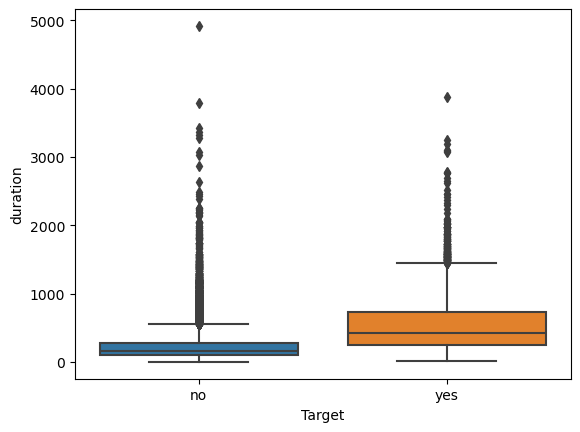

In [19]:
sns.boxplot(x = 'Target', y = 'duration',data = Bank_data)
plt.show()

In [20]:
Bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [45]:
Bank_data['age'].unique().shape

(77,)

In [37]:
num_col = ['age','balance','duration']
cat_cols = ['job','marital','default','housing','loan','poutcome','education']

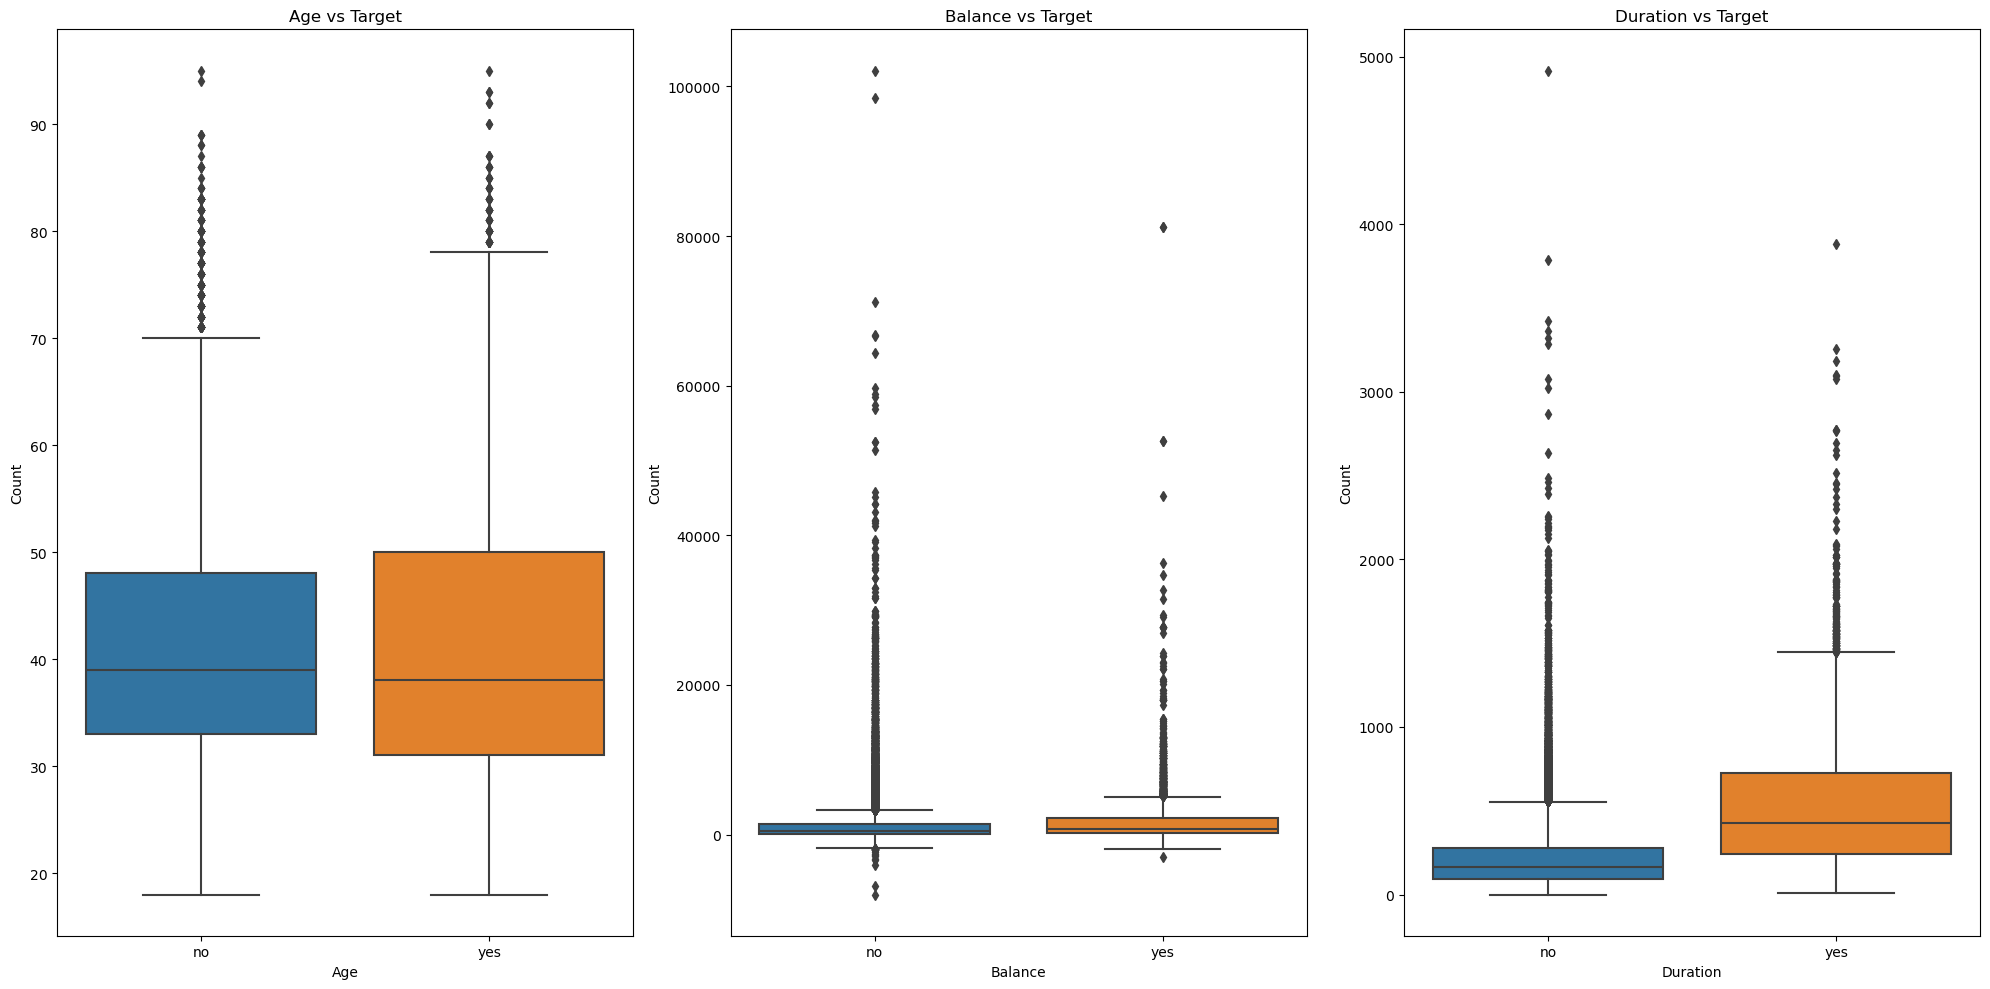

In [43]:
plt.figure(figsize = (20,10))

for i,col in enumerate(num_col,1):
    plt.subplot(1,3,i)
    sns.boxplot( x = 'Target', y = col , data = Bank_data)
    plt.title(f"{col.title()} vs Target")
    plt.xlabel(col.title())
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

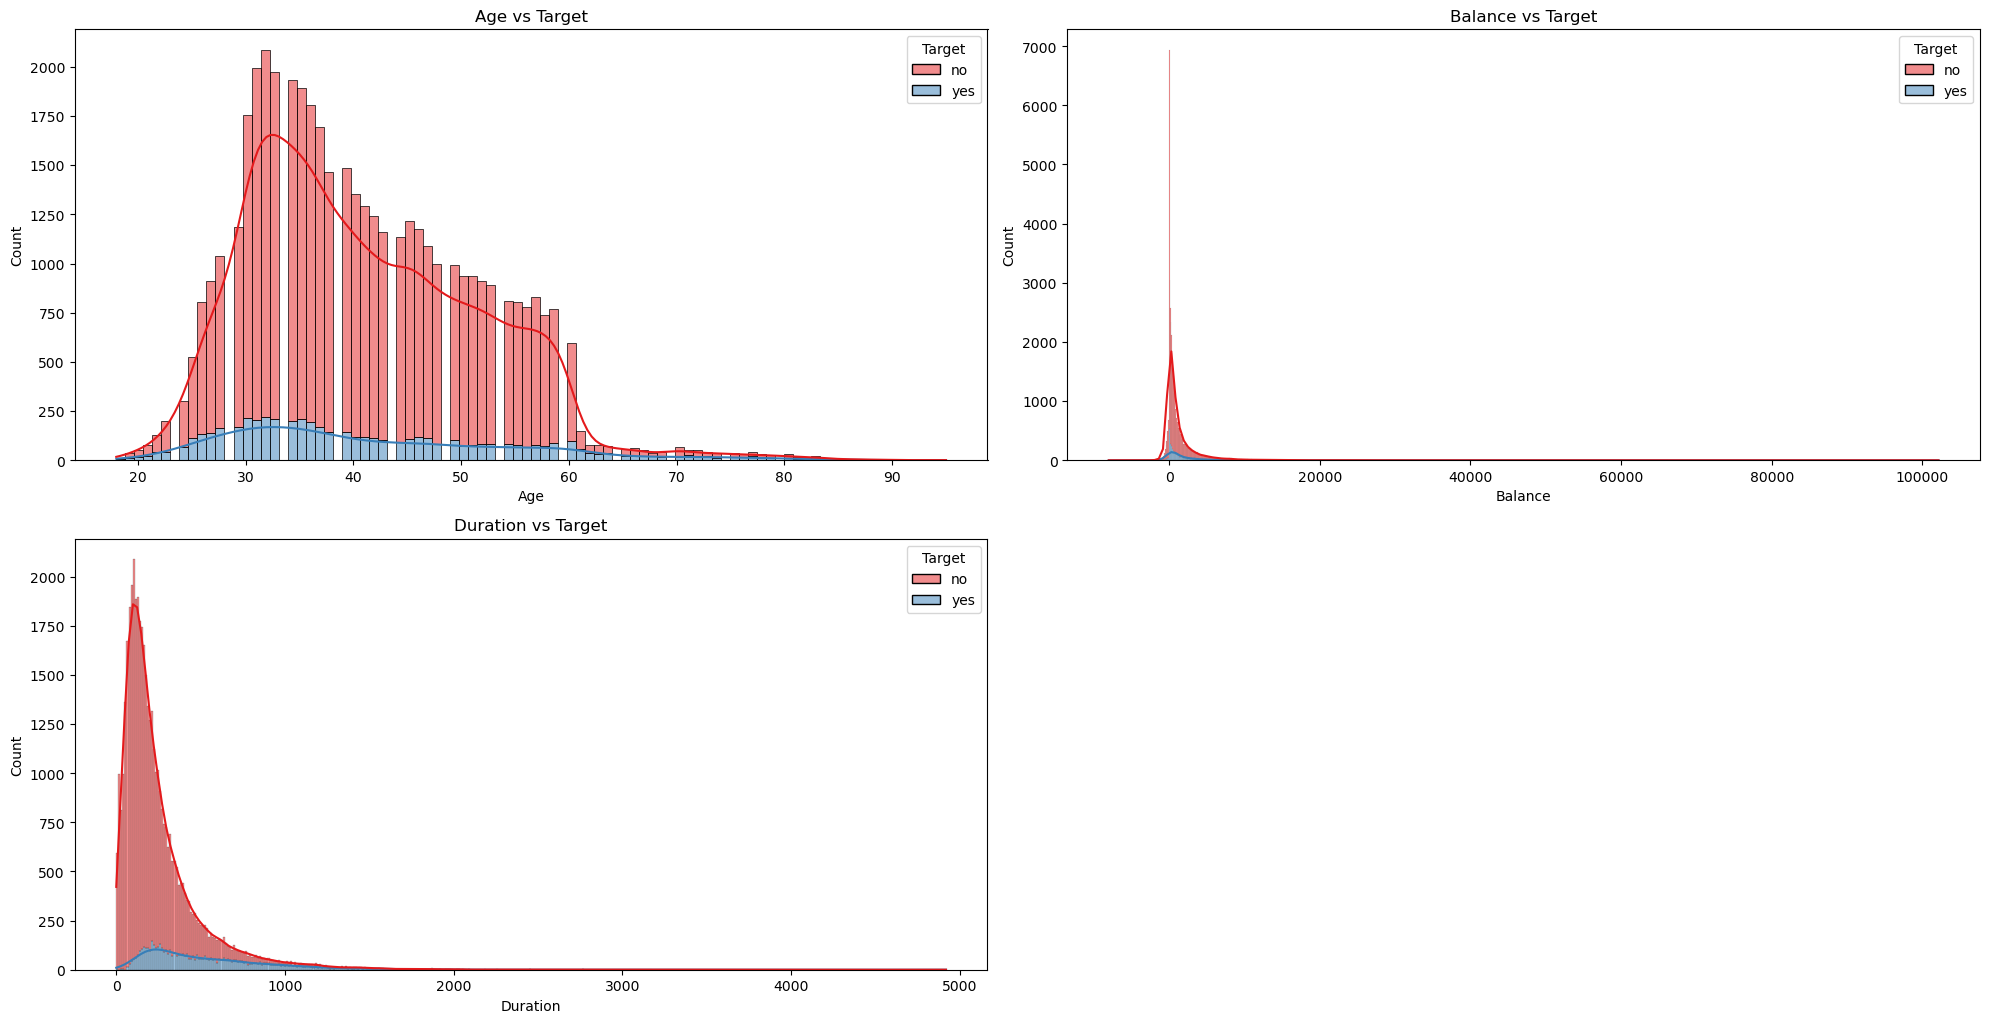

In [48]:
plt.figure(figsize = (20,15))

for i,col in enumerate(num_col,1):
    plt.subplot(len(num_col),2,i)
    sns.histplot( x = col, hue = 'Target' , data = Bank_data, kde = True, palette= 'Set1', multiple = "stack")
    plt.title(f"{col.title()} vs Target")
    plt.xlabel(col.title())
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

### **Numerical Features Insights**
1. **Age vs Target** : Students and middle aged people are more likely to subscribe

2. **Duraation vs Target** : Longer Duration had high probablity of Subscription

3. **Balance vs Target** : Balance had less impact, but high balance gives more probability of Subscription

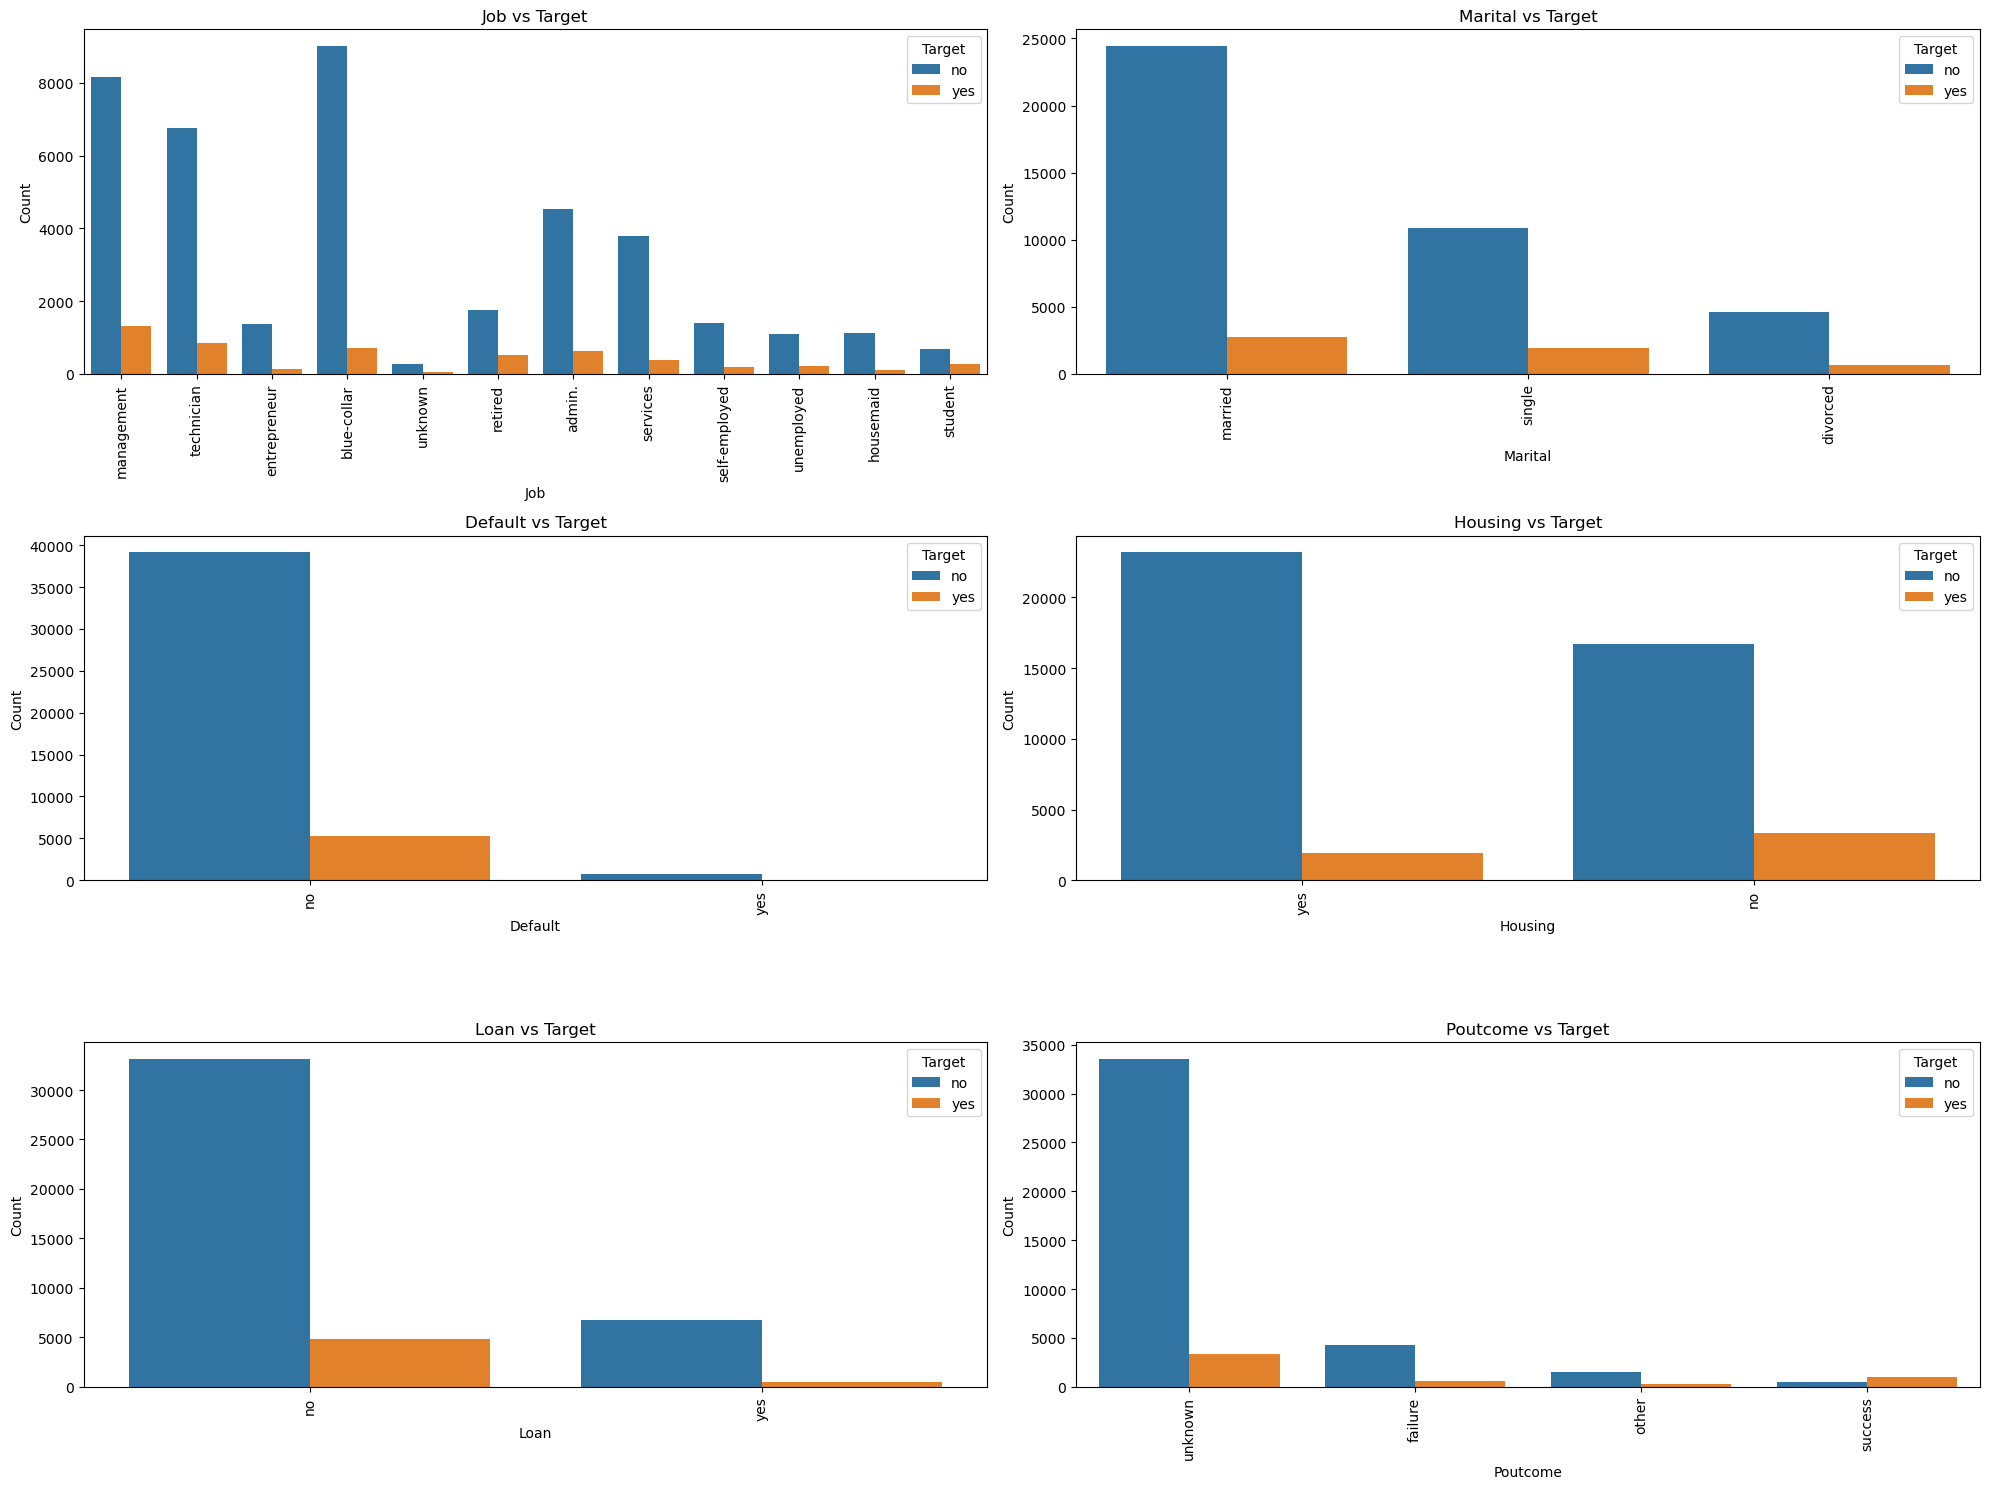

In [59]:
plt.figure(figsize = (20,20))

for i, col in enumerate(cat_cols,1):
    plt.subplot(4,2,i)
    sns.countplot(x=col, hue = "Target", data = Bank_data)
    plt.title(f"{col.title()} vs Target")
    plt.xlabel(col.title())
    plt.xticks(rotation = 90)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

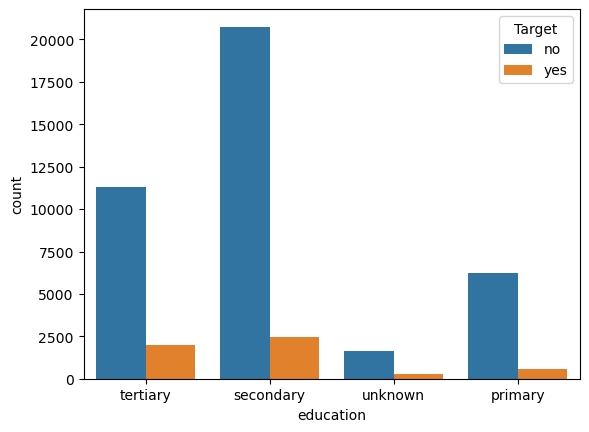

In [58]:
sns.countplot(x = 'education', hue = 'Target',data = Bank_data)
plt.show()

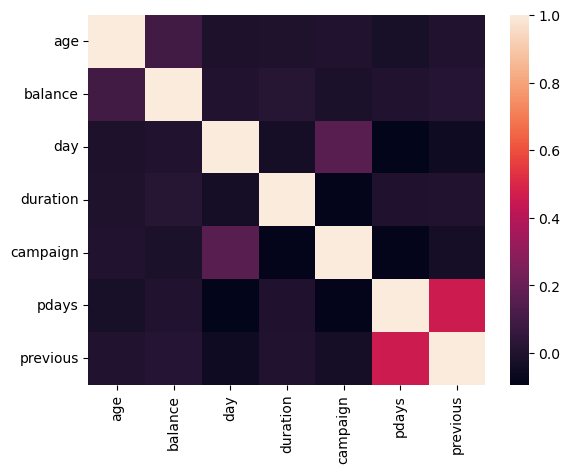

In [70]:
data = Bank_data.corr(numeric_only = True)
sns.heatmap(data=data)
plt.show()

### **Catergorical Features Insights**

1. **Job vs Target** : Students had the high subscribing Ratio

2. **Maritial vs Target** : Divorced people had less subscriptions

3. **Defaut vs Target** : People with no Defaults had subscriptions, but People with defautlts had very negligible subscriptions

4. **Housing  vs Targets** : People with no Housing Loan more subscriptions than people with Hosing Loans

5. **Loan  vs Targets** : People with no  Loan more subscriptions than people with Loans

6. **Poutcome vs Target** : Most of the Poutcomes is uknown, but success Poutcomes have more probability of Subsciptions

7. **Education vs Target** : People with Good Education background had high probability of Subsciptions

In [78]:
Bank_data['Target'].value_counts()

Target
no     39922
yes     5289
Name: count, dtype: int64

In [79]:
Bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')